Aqui está um código simples com sklearn para testar a execução de Python no Codespace com uma Decision Tree:

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Treinar a Decision Tree
clf.fit(X_train, y_train)

# Prever as classes para o conjunto de teste
y_pred = clf.predict(X_test)

# Imprimir a precisão da Decision Tree
print("Precisão:", clf.score(X_test, y_test))

Precisão: 1.0


# Exercício 1

In [2]:
from sklearn.datasets import load_digits
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns


X = load_digits().data
y = load_digits().target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Ajustando os parâmetros
param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Treinar o modelo de busca com GridSearch
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model1 = grid_search.best_estimator_

# Salvar o melhor modelo
with open('modelo_ex1.pkl', 'wb') as pickle_file:
    pk.dump(best_model1, pickle_file)

# Fazer previsões com o melhor modelo
y_pred_best = best_model1.predict(X_test)

# Avaliar a precisão do melhor modelo
print(f'Melhores Parâmetros: {grid_search.best_params_}')

accuracy = accuracy_score(y_test, y_pred_best)
print(f'Acurácia: {accuracy}')

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Melhores Parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Acurácia: 0.8777777777777778
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 32  0  3  0  0  0  0  1  0]
 [ 0  1 33  0  0  0  0  0  1  0]
 [ 0  3  0 31  0  0  0  0  1  2]
 [ 1  4  0  0 28  0  3  0  0  0]
 [ 0  0  0  0  1 35  0  0  0  1]
 [ 0  0  0  0  2  0 34  0  0  0]
 [ 0  1  0  0  1  0  0 34  0  0]
 [ 0  3  1  2  0  0  1  0 25  3]
 [ 1  2  0  0  1  2  0  1  0 29]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           1       0.70      0.89      0.78        36
           2       0.97      0.94      0.96        35
           3       0.86      0.84      0.85        37
           4       0.82      0.78      0.80        36
           5       0.95      0.95      0.95        37
           6       0.89      0.94      0.92        36
           7       0.97      0.94      0.96        36
           8       0.89      0.71      0.79        35
           9 

## sklearn.datasets.load_digits

- Classes: 10
- Samples per class: ~180
- Samples total: 1797
- Dimensionality: 64
- Features: integers 0-16

(1437, 64)
[ 0.  0.  0.  2. 14.  0.  0.  0.  0.  0.  0. 10.  9.  0.  0.  0.  0.  0.
  1. 15.  8. 11.  0.  0.  0.  0. 12.  7. 12.  8.  0.  0.  0.  5. 16. 12.
 15. 14.  5.  0.  0.  8. 13.  9. 16. 13.  3.  0.  0.  0.  0.  0. 16.  4.
  0.  0.  0.  0.  0.  0. 16.  6.  0.  0.]


<function matplotlib.pyplot.show(close=None, block=None)>

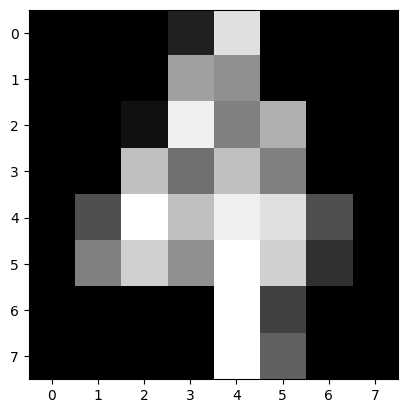

In [30]:
print(X_train.shape)
print(X_train[0])

plt.imshow(np.reshape(X_train[0], (8,8)), cmap=plt.cm.gray)
plt.show

# Exercício 2

## Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Ajustando os parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 15, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    #'max_features': ['auto', 'sqrt', 'log2'],
    #'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Treinar o modelo de busca com GridSearch
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model2a = grid_search.best_estimator_

# Salvar modelo
with open('modelo_ex21a.pkl', 'wb') as pickle_file:
    pk.dump(best_model2a, pickle_file)

y_pred_best2a = best_model2a.predict(X_test)

print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Acurácia: {accuracy_score(y_test, y_pred_best2a)}')

print(confusion_matrix(y_test, y_pred_best2a))
print(classification_report(y_test, y_pred_best2a))

Melhores Parâmetros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Acurácia: 0.9777777777777777
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  2  0  0  0  0  0 31  0]
 [ 0  0  0  1  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.95      1.00      0.97        36
           2       0.95      1.00      0.97        35
           3       0.97      0.97      0.97        37
           4       0.97      1.00      0.99        36
           5       0.97      0.97      0.97        37
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       1.00      0.89      0.94   

## XGBoost

In [6]:
import xgboost as xgb

# Ajustando os parâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 15, 25],
    'min_child_weight': [1, 3, 5]
    #'subsample': [0.7, 0.8, 0.9],
    #'colsample_bytree': [0.7, 0.8, 0.9],
    #'gamma': [0, 0.1, 0.2],
    #'reg_alpha': [0, 0.1, 1.0],
    #'reg_lambda': [0, 0.1, 1.0]
}

grid_search = GridSearchCV(estimator=xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2), param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Treinar o modelo de busca com GridSearch
grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)

# Melhor modelo encontrado
best_model2b = grid_search.best_estimator_

#clf2b =  xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2) 
#model2b = clf2b.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# Salvar modelo
with open('modelo_ex21b.pkl', 'wb') as pickle_file:
    pk.dump(best_model2b, pickle_file)

y_pred_best2b = best_model2b.predict(X_test)

print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Acurácia: {accuracy_score(y_test, y_pred_best2b)}')

print(confusion_matrix(y_test, y_pred_best2b))
print(classification_report(y_test, y_pred_best2b))

Melhores Parâmetros: {'learning_rate': 0.1, 'max_depth': 15, 'min_child_weight': 5, 'n_estimators': 200}
Acurácia: 0.9666666666666667
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  1 35  0  0  0  0  0  1]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 35  1  0]
 [ 0  1  0  2  0  0  0  0 31  1]
 [ 0  0  0  1  0  0  0  1  0 34]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.97      0.97      0.97        36
           2       0.97      1.00      0.99        35
           3       0.92      0.95      0.93        37
           4       0.97      1.00      0.99        36
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        36
           7       0.97      0.97      0.97        36
           8       0.97      0.89      0.93     

# Exercício 3

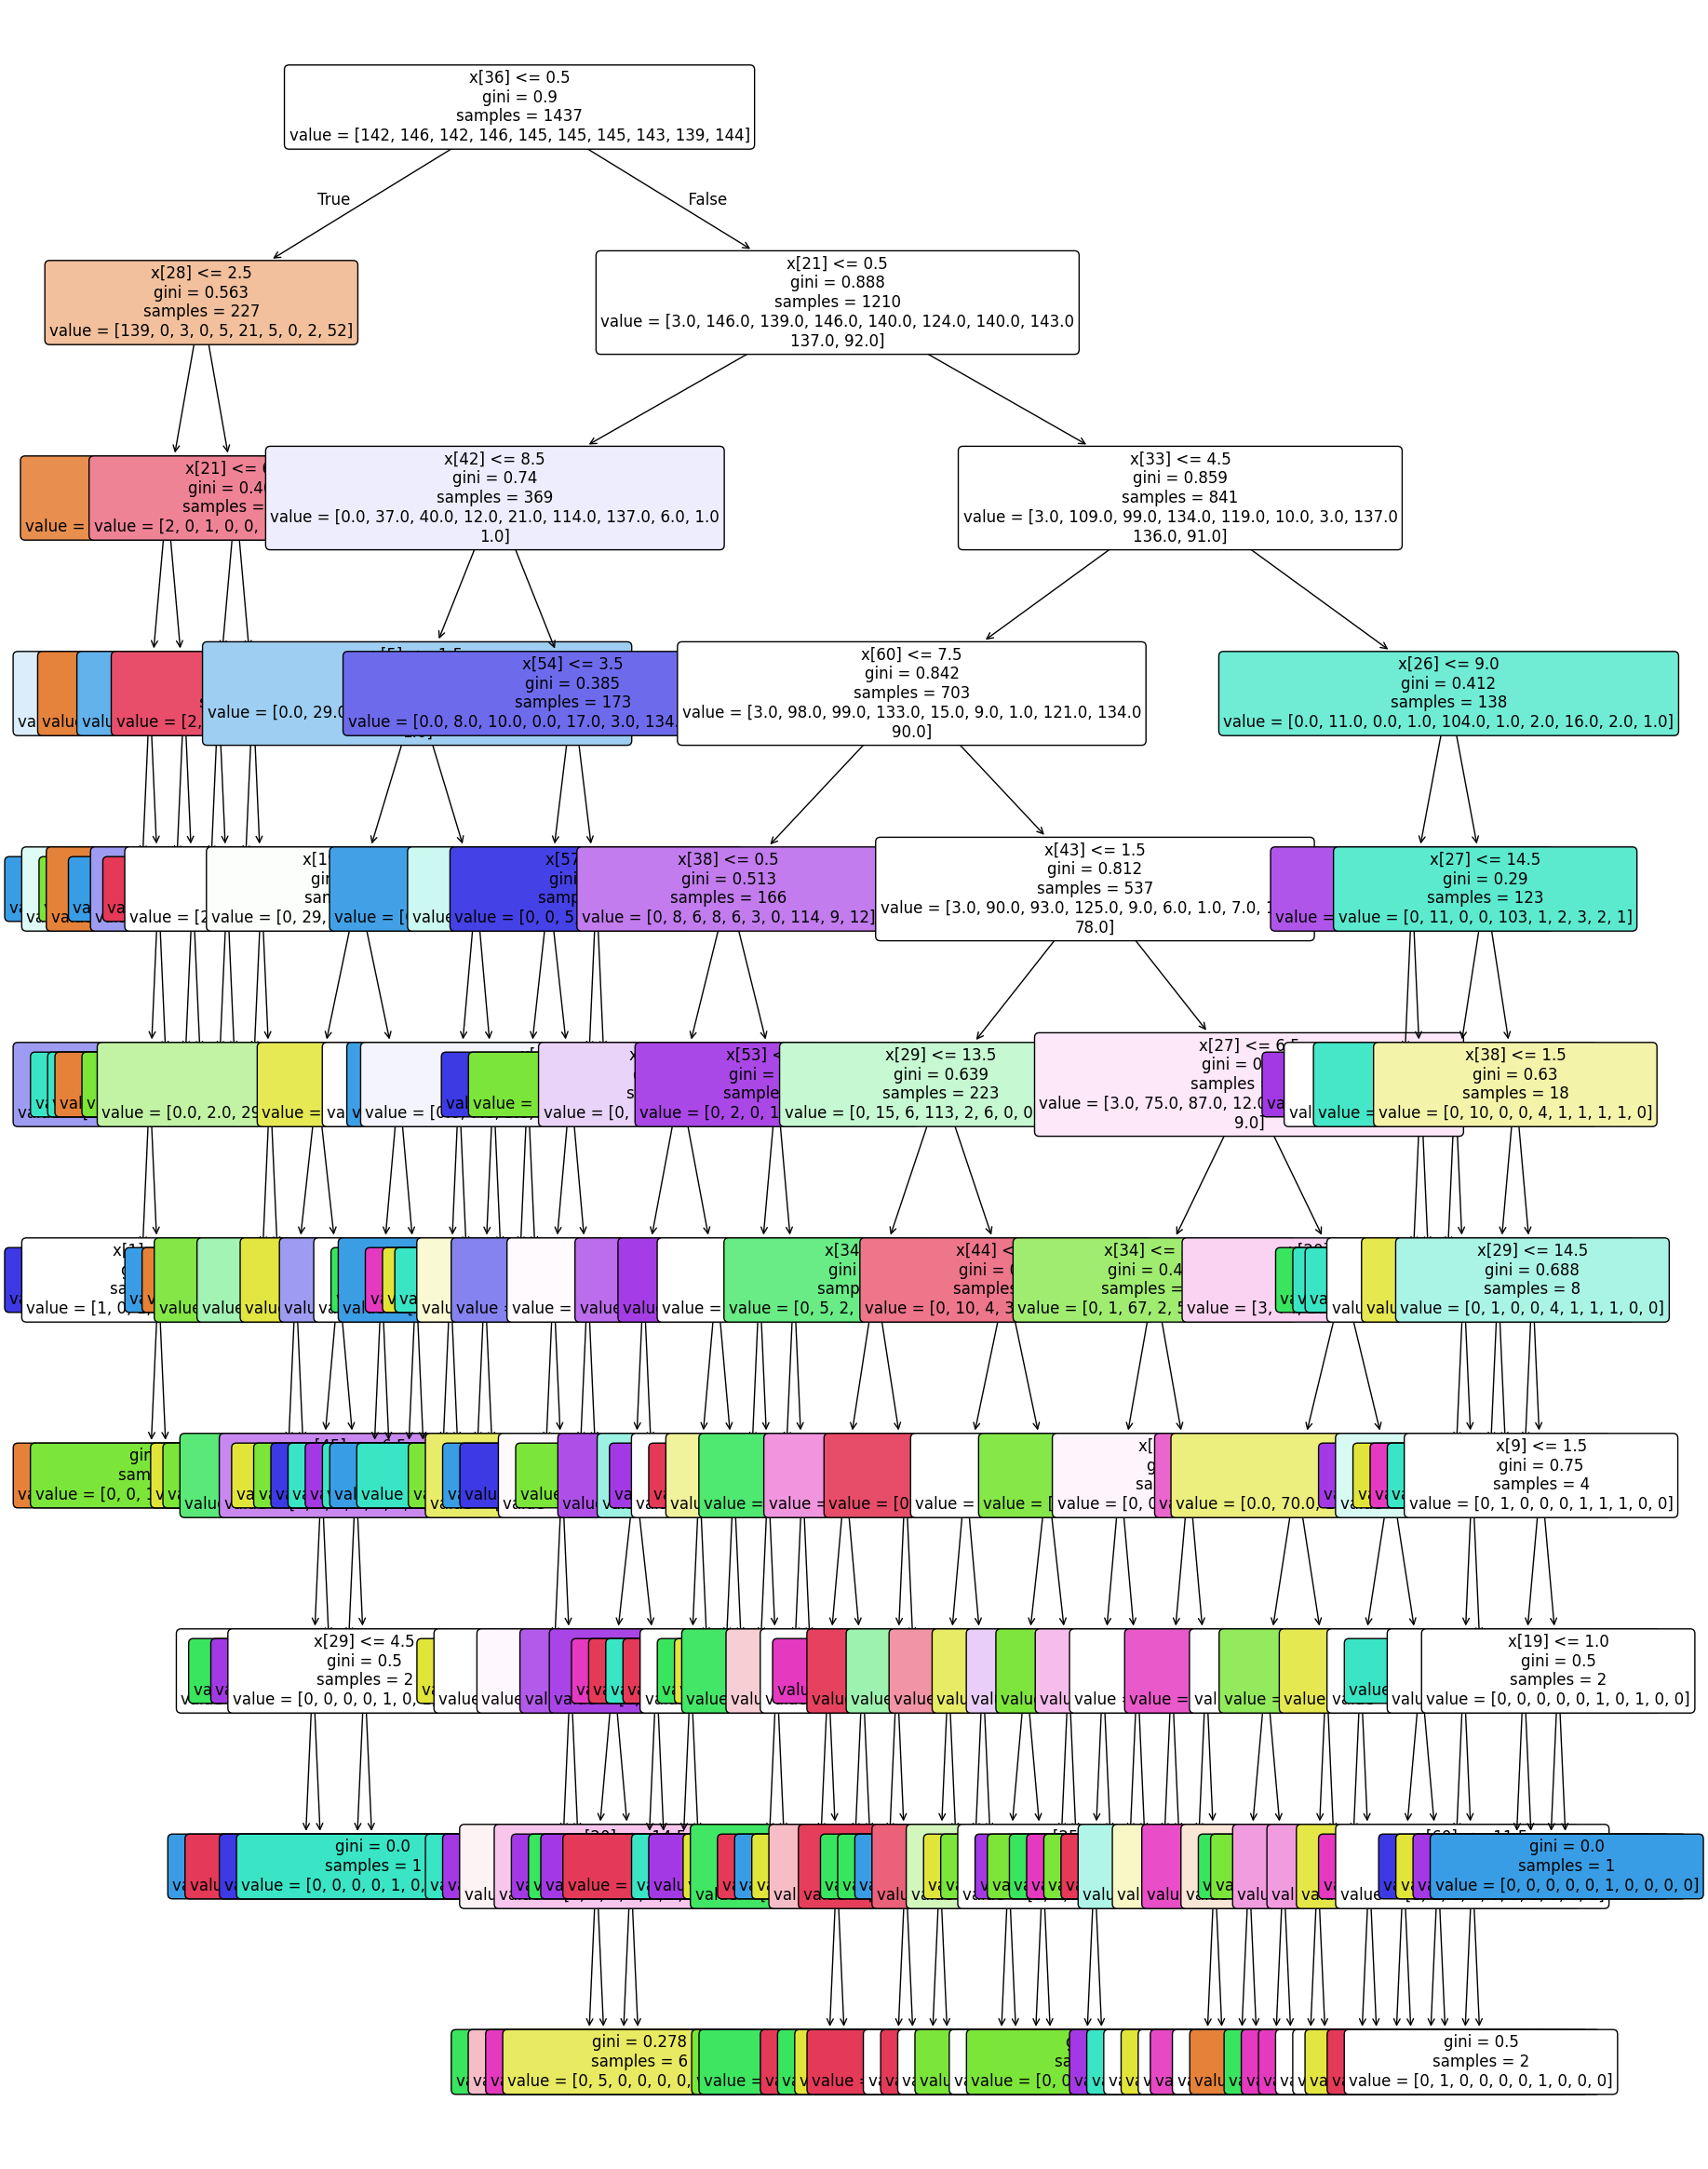

In [3]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,30))
plot_tree(best_model1,  filled=True, rounded=True, fontsize=12)
plt.show()

In [4]:
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Treinar o modelo usando o critério Gini
model_gini = tree.DecisionTreeClassifier(criterion='gini')
model_gini.fit(X_train, y_train)
y_pred_gini = model_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f'Acurácia com Gini: {accuracy_gini}')

# Treinar o modelo usando o critério Entropia
model_entropy = tree.DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)
y_pred_entropy = model_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f'Acurácia com Entropia: {accuracy_entropy}')

Acurácia com Gini: 0.8805555555555555
Acurácia com Entropia: 0.8722222222222222


# Exercício 4

- Arquivo Dockerfile criado
- Configurada as depedência no arquivo requirements.txt
- Ambiente de execução configurado
- Criada a imagem docker
- Imagem docker executado

Docker criado: 
```
docker build -t imagem-docker .
```


Docker executado: 
```
docker run -p 8000:8000 imagem-docker
```



# Exercício 5

- Criado o arquivo main.py usando a bilbioteca FastAPI
- Criado o método POST /predict que recebe um vetor de float e retorna a predição 
- Configurada a porta 8000 na aplicação que está disponibilizada no docker
- API executando com sucesso no docker
- Acesso a porta 8000 testada com sucesso
- Docker em execução como WebAPI. Servço disponibilizado na porta 8000 do servidor (que redireciona para a porta 8000 da aplicação dentro do docker)


## Testando o modelo que será implementado no main.py

In [39]:
import math
import pickle as pk
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


print('Carregando imagem positiva')
img = mpimg.imread('../imagens/imagem_positiva.png')
print('Image RGB: ', img.shape)

img_gray = (np.array(rgb2gray(img)) * 17).astype(int).astype(float)
print('Imagem cinza:', img_gray.shape)

vec = img_gray.reshape(1,-1)
print('Vetor:', vec.shape)
print(vec)

with open("modelo_ex21a.pkl", "rb") as f:
    model = pk.load(f)
    predict = model.predict(vec)

print('Predição:', predict)

Carregando imagem positiva
Image RGB:  (8, 8, 4)
Imagem cinza: (8, 8)
Vetor: (1, 64)
[[ 0.  0.  5. 14. 10.  1.  0.  0.  0.  0. 14. 16. 11. 16.  5.  0.  0.  3.
  16.  2.  0. 12.  9.  0.  0.  4. 13.  0.  0.  9.  9.  0.  0.  5.  9.  0.
   0. 10.  9.  0.  0.  4. 12.  0.  1. 13.  7.  0.  0.  2. 15.  5. 11. 13.
   0.  0.  0.  0.  6. 14. 11.  0.  0.  0.]]
Predição: [0]


In [40]:
print('Carregando imagem positiva com ruido')
img = mpimg.imread('../imagens/imagem_positiva_ruido.png')

img_gray = (np.array(rgb2gray(img)) * 17).astype(int).astype(float)

vec = img_gray.reshape(1,-1)
print(vec)

with open("modelo_ex21a.pkl", "rb") as f:
    model = pk.load(f)
    predict = model.predict(vec)

print('Predição:', predict)

Carregando imagem positiva com ruido
[[ 0.  0.  5. 14. 10.  1.  0.  0.  0.  0. 14. 16. 11. 16.  5.  0.  0.  3.
  16.  2.  0. 12.  9.  0.  0.  4. 13.  0.  0.  9.  9.  0.  0.  5.  9.  0.
   0. 10.  9.  0.  0.  4. 12.  0.  1. 13.  7.  0.  0.  2. 15.  5. 11. 13.
   0.  0.  0.  0.  6. 14. 11.  0.  0.  0.]]
Predição: [0]


In [42]:
print('Carregando imagem negativa')
img = mpimg.imread('../imagens/imagem_negativa.png')

img_gray = (np.array(rgb2gray(img)) * 17).astype(int).astype(float)

vec = img_gray.reshape(1,-1)
print(vec)

with open("modelo_ex21a.pkl", "rb") as f:
    model = pk.load(f)
    predict = model.predict(vec)

print('Predição:', predict)

Carregando imagem negativa
[[16. 11. 11.  5.  7.  6. 16. 14. 13.  0. 12.  9. 11.  6. 13. 10.  9. 16.
  11.  5. 15. 13. 10.  7.  3.  6. 15. 16.  8.  0.  0. 13. 10. 10.  4. 10.
   6. 10.  4.  9. 10.  5. 10. 13.  3.  4. 13. 13.  6. 10. 13. 11.  7.  2.
   8. 11.  3.  2. 14. 14. 13. 15. 15.  8.]]
Predição: [8]


# Exercício 6

- Implementado o notebook client.ipynb
- 